<a href="https://colab.research.google.com/github/iam-tsr/cats-vs-dogs-classification/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Importing

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:09<00:00, 275MB/s]
100% 1.06G/1.06G [00:09<00:00, 120MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Initialization and Defining

In [ ]:
# import mastermind
import math

# import data handling tools
import cv2
import numpy as np
import matplotlib.pyplot as plt

# import Deep learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
import visualkeras

In [ ]:
TRAIN_DATA_DIR = '/content/train'
VALIDATION_DATA_DIR = '/content/test'
TRAIN_SAMPLES = 500
VALIDATION_SAMPLES = 500
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 244, 244
BATCH_SIZE = 64

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   zoom_range = 0.2)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 12345,
    class_mode = 'categorical'
)

validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = BATCH_SIZE,
    shuffle = False,
    seed = 12345,
    class_mode = 'categorical'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Creating CNN model

In [ ]:
def model_maker():
    base_model = MobileNet(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    for layer in base_model.layers[:]:
        layer.trainable = False # Freeze the layers
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    return Model(inputs=input, outputs=predictions)

In [ ]:
model = model_maker()
model.summary()

<ipython-input-8-489749badce1>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,294,594 (12.57 MB)

 Trainable params: 65,730 (256.76 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


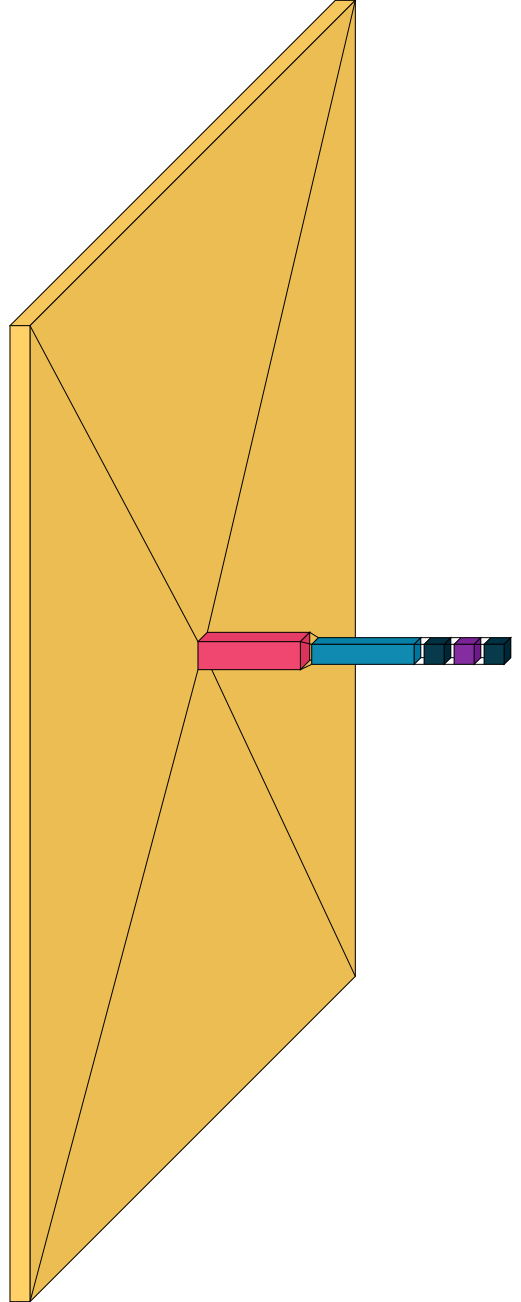

In [ ]:
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
# visualkeras.layered_view(model, to_file='output.png', draw_funnels=True) # optionally draw funnels

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics =['acc'])

num_steps = math.ceil(float(TRAIN_SAMPLES)/BATCH_SIZE)

history = model.fit(train_generator,
                    steps_per_epoch = num_steps,
                    epochs=10,
                    validation_data = validation_generator,
                    validation_steps = num_steps)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - acc: 0.6740 - loss: 0.7265 - val_acc: 0.8828 - val_loss: 0.2923
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.8973 - loss: 0.2628 - val_acc: 0.9805 - val_loss: 0.0598
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9036 - loss: 0.1821 - val_acc: 0.9473 - val_loss: 0.1387
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - acc: 0.9624 - loss: 0.1301 - val_acc: 0.9668 - val_loss: 0.0860
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9456 - loss: 0.1348 - val_acc: 0.9746 - val_loss: 0.0868
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9493 - loss: 0.1165 - val_acc: 0.9902 - val_loss: 0.0415
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - acc: 0.9458 - loss: 0.1436 - val_acc: 0.9668 - val_loss: 0.0791
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9678 - loss: 0.0766 - val_acc: 0.9805 - val_loss: 0.0503
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - acc: 0.9618 - loss: 0.1140 - val_acc: 0.9727 - val_loss: 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
tf.keras.models.save_model(model, '/content/model.h5')

# Plots

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['acc']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_acc']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

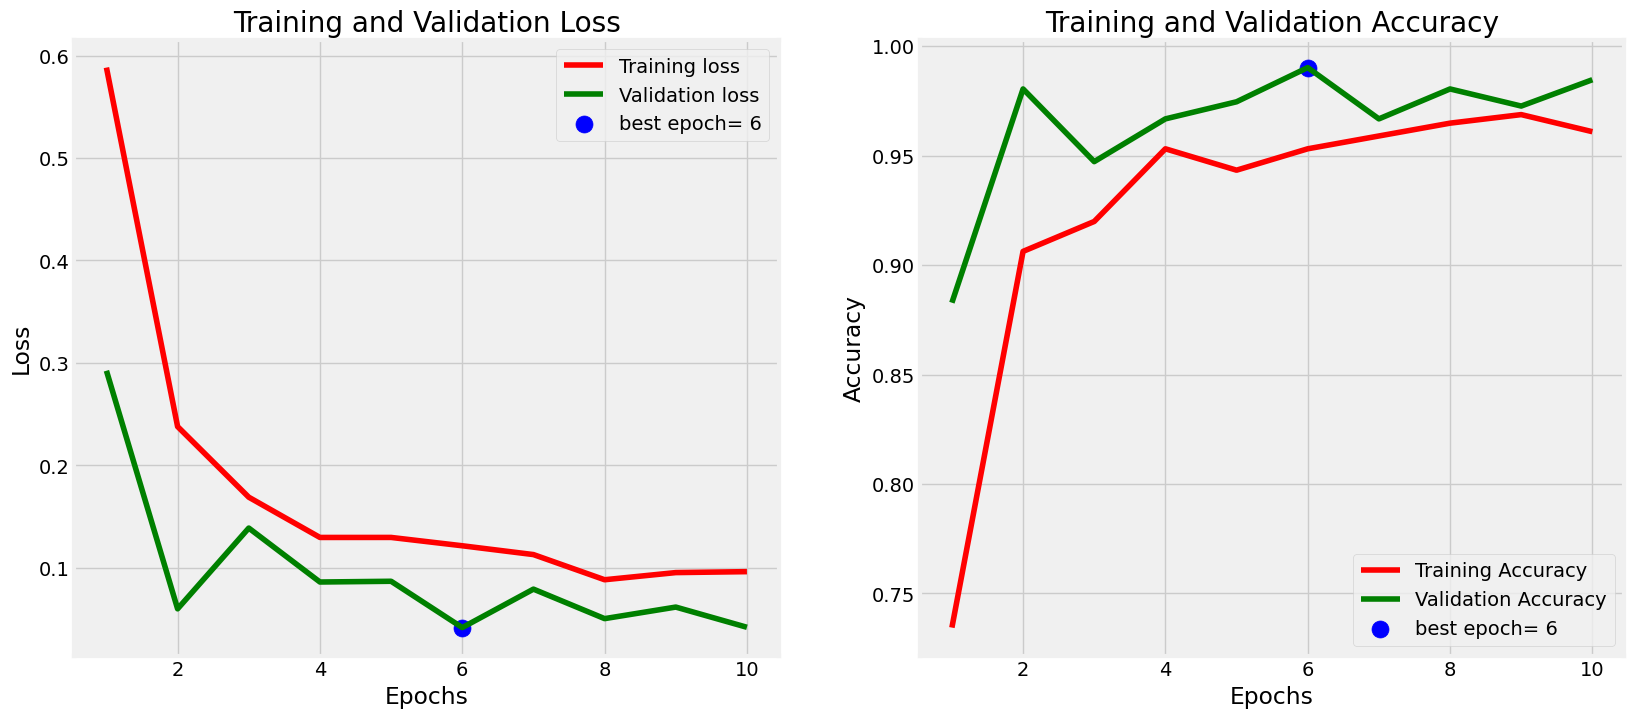

In [ ]:
plot_training(history)

# Prediction

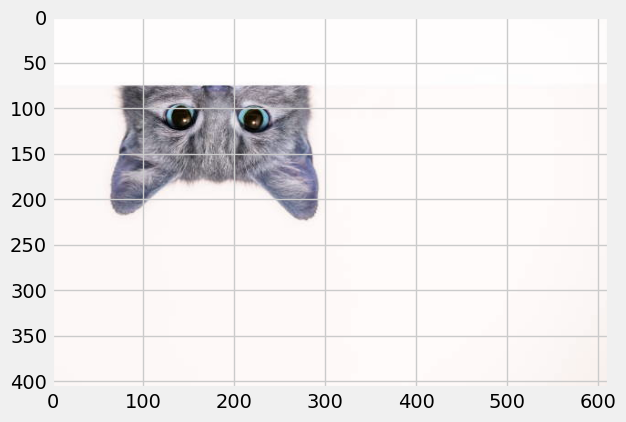

In [ ]:
test_img = cv2.imread('/content/image.jpg')
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(244,244)) # Resize the image to 244x244 pixels
test_input = test_img.reshape((1,244,244,3))

In [ ]:
preprocessed_img = preprocess_input(test_input) # Preprcess the image
prediction = model.predict(preprocessed_img)

# print(prediction)
# print(validation_generator.class_indices)

if prediction[0][0] > prediction[0][1]:
  print('cat')
else:
  print('dog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
cat


### Author: **Anshul Dubey**